In [107]:
import pandas as pd 
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, InputLayer
import tensorflow
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [87]:
data= pd.read_csv("yeni-features.csv")

In [88]:
data.labels.value_counts()

fear       7692
happy      7692
angry      7692
sad        7692
disgust    7692
neutral    6812
Name: labels, dtype: int64

In [89]:
X = data.drop("labels",axis=1)
Y = data["labels"]

In [90]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder

In [91]:
encoder = OneHotEncoder()

In [92]:
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [93]:
from sklearn.model_selection import train_test_split

In [234]:
x_train,x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

In [235]:
y_train.shape,y_test.shape

((36217, 6), (9055, 6))

In [236]:
scaler = MinMaxScaler()

In [237]:
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [238]:
x_train.shape

(36217, 57)

## Modelling

In [214]:
model = Sequential()

model.add(tensorflow.keras.Input(shape=x_train.shape[1]))
model.add(Dense(256, activation="relu"))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

model.compile(optimizer="adam",loss="CategoricalCrossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 256)               14848     
_________________________________________________________________
dense_46 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_47 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_48 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_49 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_50 (Dense)             (None, 6)                 390       
Total params: 319,302
Trainable params: 319,302
Non-trainable params: 0
________________________________________________

In [215]:
early = EarlyStopping(monitor="val_loss",patience=5)

In [216]:
model_path = "C:/Users/emreh/Desktop/Speech Emotion Recognition/Model/modelcheck/weights-improvment.hdf5"

In [217]:
modelcheck = ModelCheckpoint(model_path,monitor="val_acc",verbose=1,save_best_only=True,mode="max")

In [218]:
model.fit(x=x_train,y=y_train,batch_size=256,epochs=500,validation_data=(x_test,y_test),callbacks=[early])

Epoch 1/500
142/142 [==============================] - 2s 6ms/step - loss: 1.5988 - accuracy: 0.3264 - val_loss: 1.4450 - val_accuracy: 0.4061
Epoch 2/500
142/142 [==============================] - 1s 5ms/step - loss: 1.4025 - accuracy: 0.4328 - val_loss: 1.3482 - val_accuracy: 0.4575
Epoch 3/500
142/142 [==============================] - 1s 5ms/step - loss: 1.3146 - accuracy: 0.4721 - val_loss: 1.2709 - val_accuracy: 0.4893
Epoch 4/500
142/142 [==============================] - 1s 5ms/step - loss: 1.2519 - accuracy: 0.4945 - val_loss: 1.2882 - val_accuracy: 0.4819
Epoch 5/500
142/142 [==============================] - 1s 5ms/step - loss: 1.2229 - accuracy: 0.5089 - val_loss: 1.2299 - val_accuracy: 0.5051
Epoch 6/500
142/142 [==============================] - 1s 5ms/step - loss: 1.1973 - accuracy: 0.5180 - val_loss: 1.2485 - val_accuracy: 0.4847
Epoch 7/500
142/142 [==============================] - 1s 5ms/step - loss: 1.1636 - accuracy: 0.5309 - val_loss: 1.1563 - val_accuracy: 0.5373

In [219]:
import matplotlib.pyplot as plt

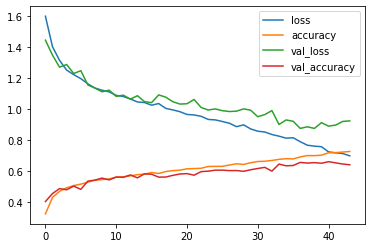

In [220]:
history  = pd.DataFrame(model.history.history)
plt.plot(history)
plt.legend(history.columns)

In [221]:
model.evaluate(x_test,y_test)

283/283 [==============================] - 1s 3ms/step - loss: 0.9252 - accuracy: 0.6427


[0.9252049922943115, 0.6427388191223145]

Deneme

In [241]:
happy = pd.read_csv("happy_me")
sad = pd.read_csv("sad_me")

In [242]:
happy = happy.drop("Unnamed: 0", axis=1).T

In [243]:
happy

0         1         2         3         4         5         6   \
0  0.056837  0.746251  0.676785  0.674182  0.641957  0.591144  0.652026   

         7         8         9   ...        47       48        49        50  \
0  0.686866  0.726485  0.745232  ...  0.031187 -0.00301  0.000131 -0.005071   

        51        52        53           54             55           56  
0 -0.01113  0.117444  0.025778  2607.291638  144189.297082  2324.859526  

[1 rows x 57 columns]

In [244]:
sad = sad.drop("Unnamed: 0", axis=1)

In [245]:
sad

0         1         2         3         4         5         6  \
0  0.062074  0.750168  0.759754  0.778697  0.815599  0.721649  0.698436   

          7         8         9  ...        47        48        49        50  \
0  0.726562  0.765106  0.749578  ...  0.011669  0.003074 -0.006372  0.001604   

         51        52        53           54             55           56  
0  0.007062  0.031951  0.001528  2656.205547  137948.153449  2366.373385  

[1 rows x 57 columns]

In [246]:
sad = scaler.transform(sad)
happy = scaler.transform(happy)

In [247]:
sad

array([[0.08946379, 0.79610769, 0.78780507, 0.81199557, 0.83780703,
        0.72173622, 0.73888959, 0.73305889, 0.76581278, 0.75089364,
        0.81817337, 0.83862249, 0.82973847, 0.71375488, 0.48838484,
        0.71578224, 0.55744033, 0.62825076, 0.52097941, 0.60848488,
        0.65347576, 0.66280282, 0.55369345, 0.67058136, 0.49309136,
        0.52555639, 0.38542662, 0.33720593, 0.62769303, 0.61027516,
        0.43435561, 0.3064114 , 0.57407542, 0.5995448 , 0.43858724,
        0.52351564, 0.42634164, 0.49324274, 0.54960789, 0.62591418,
        0.4714922 , 0.38356398, 0.29717121, 0.34067233, 0.45287765,
        0.42403811, 0.4189197 , 0.3420855 , 0.31995335, 0.41579595,
        0.49780134, 0.39480587, 0.08444193, 0.02207251, 0.75451205,
        0.13117166, 0.30590449]])

In [248]:
sad_predict= model.predict(sad)

In [249]:
encoder.inverse_transform(sad_predict)

array([['angry']], dtype=object)

In [250]:
happy

array([[0.08191592, 0.79195121, 0.70177245, 0.7030114 , 0.65943698,
        0.59121583, 0.68979211, 0.69300811, 0.72715588, 0.74653964,
        0.82319904, 0.7781142 , 0.75014177, 0.77554129, 0.47655461,
        0.71583752, 0.56969882, 0.64214322, 0.51159875, 0.49177411,
        0.62657893, 0.65021385, 0.51127429, 0.60277693, 0.36558058,
        0.47624028, 0.39164257, 0.33767792, 0.61562522, 0.6100703 ,
        0.43437788, 0.31329796, 0.58374877, 0.60009867, 0.40043606,
        0.51622322, 0.4401193 , 0.51618205, 0.55439431, 0.62188386,
        0.47408189, 0.38566973, 0.298357  , 0.3394357 , 0.44236298,
        0.42365323, 0.4078132 , 0.34693392, 0.31817992, 0.41775162,
        0.49471028, 0.38720068, 0.31039303, 0.3724837 , 0.74061774,
        0.13710622, 0.30053793]])

In [251]:
happy_predict = model.predict(happy)

In [252]:
encoder.inverse_transform(happy_predict)

array([['happy']], dtype=object)